<a href="https://colab.research.google.com/github/mauluna/IB_Fenomenos_Bioelectricos/blob/main/Copia_de_Copia_de_FBAct_1_Programacion_simbolica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulacion del potencial de GHK en lenguaje simbolico matematico

Mediante este laboratorio descubrira la deficion de variables matematicas en lenguaje simbolico para introducir las ecuaciones y funciones en el tiempo que permiten calcular el potencial de Nernst y el potencial de Goldman-Hodgkin-Katz.

La actividad consiste en escribir de manera correcta el valor de la variable o de la funcion faltante dentro de una celda remplazando el valor `None`. Ejemplo:

In [7]:
K_o = 125
K_i = 30

# Definal el valor de relacion de concentracion de potacio extracelular
# respecto a la concentracion intracelular del mismo ion.

dKio = K_o/K_i
dKio

4.166666666666667

Resultado esperado: `dKio = K_o/K_i`

Tabla 1 de valores de concentracion.

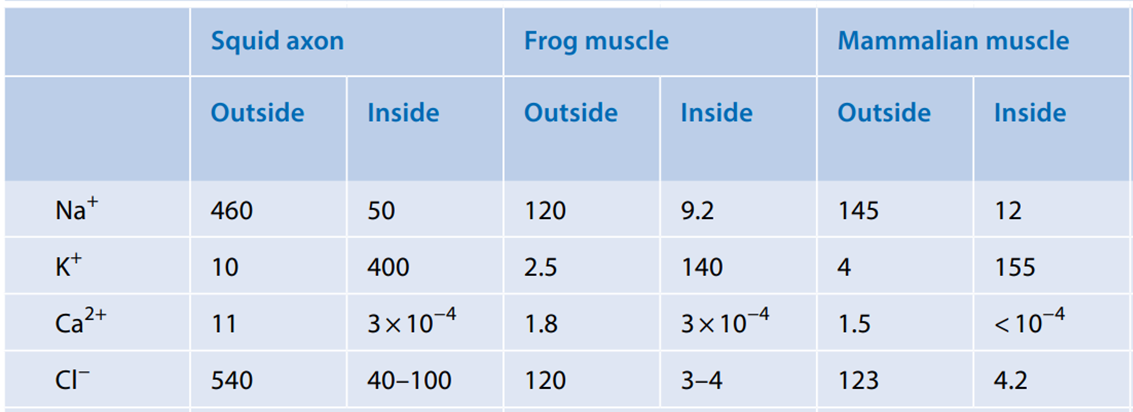

**Nota**: considere Cl=100 y Cl=4 para el calamar y la rana respectivamente.

## 1. Instalacion de la libreria SymPy

La celda solo instalara la libreria si es necesario

In [8]:
try:
  import sympy
  print('SymPy fue importado con exito')
except:
  !pip install sympy

SymPy fue importado con exito


## 2. Importar modulos requeridos para definicion de variables simbolicas

Seleccionar alguna de las 2 opciones disponibles:

    * Symbol <- permite definir solo una variable simbolica matematica
    * symbols <- permite definir varias variables simbolicas a la *vez*

In [9]:
from sympy import Symbol
from sympy import log

Definicion de variables simples y de metodo de representacion

In [10]:
x = Symbol('x')
x

x

In [11]:
y = Symbol('y')
y

y

In [12]:
z = x**2+y**3+3*x*y+2*y-3*x

In [13]:
z

x**2 + 3*x*y - 3*x + y**3 + 2*y

Solucion de operaciones con variables simbolicas mediante la asignacion de valores numericos a las variables simbolicas matematicas

In [14]:
z = 3*x+y
z

3*x + y

In [15]:
z.subs({x:3,y:1})

10

## 3. Simulacion del potencial de Nernst del Potasio del musculo de una rana

Definicion de las constantes de la ecuacion

In [19]:
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')

Definicion de variables para calcular el potencial de Nernst del K

In [53]:
K_in = Symbol('Ci,k')
K_out = Symbol('Co,k')
K_z = Symbol('z_k')

Definicion de la funcion del potencial de Nernst del K

In [54]:
V_K = -((R*T)/(K_z*F))*(log(K_in/K_out))
V_K

-R*T*log(Ci,k/Co,k)/(F*z_k)

Resultado esperado.


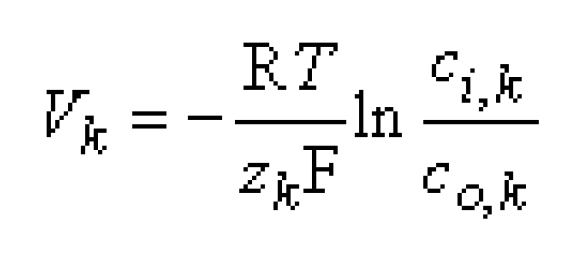

Asignacion de valores numericos a las variables de concentracion de K

In [42]:
V_K.subs({R:8.314, T:298.15, F:96485, K_z:1, K_in:140, K_out:2.5})

-0.103416268385879

Obtenga el potencial de Nernst del Sodio y del Cloro del musculo de rana con

1.   Elemento de lista
2.   Elemento de lista

los datos de la Tabla 1.

Recuerde definir las variables necesarias, mostrar la ecuacion en lenguaje simbolico en una celda, y el resultado de la operacion en la siguiente celda.

In [51]:
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')
Na_z = Symbol('z_Na')
Na_in = Symbol('Ci,Na')
Na_out = Symbol('Co,Na')
V_Na = -((R*T)/(Na_z*F))*(log(Na_in/Na_out))
V_Na

-R*T*log(Ci,Na/Co,Na)/(F*z_Na)

In [52]:
V_Na.subs({R:8.314, T:298.15, F:96485, Na_z:1, Na_in:9.2, Na_out:120})

0.0659825049493533

In [56]:
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')
Cl_z = Symbol('z_Cl')
Cl_in = Symbol('Ci,Cl')
Cl_out = Symbol('Co,Cl')
V_Cl = -((R*T)/(Cl_z*F))*(log(Cl_in/Cl_out))
V_Cl

-R*T*log(Ci,Cl/Co,Cl)/(F*z_Cl)

In [55]:
V_Cl.subs({R:8.314, T:298.15, F:96485, Cl_z:-1, Cl_in:4, Cl_out:120}).evalf()

-0.0873809714726034

## 4. Definicion de la ecuacion del potencial de GHK

Utilice los siguientes valores de permeabilidad para simular el potencial de GHK de un:

Axon de calamar:
* P_Na=0.04
* P_K=1
* P_Cl=0.45

Musculo de rana
* P_Na=2*(10^(-8))
* P_K=2*(10^(-6))
* P_Cl=4*(10^(-6))

Musculo de un mamifero
* P_Na=0.04
* P_K=1
* P_Cl=0.45



In [59]:
# Utilice este espacio para definir sus variables simbolicas para obtener el potencial de GHK de un axon de calamar
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')
P_Na = Symbol('P_Na')
P_K = Symbol('P_K')
P_Cl = Symbol('P_Cl')
Na_out = Symbol('[Na]_o')
K_out = Symbol('[K]_o')
Cl_in = Symbol('[Cl]_i')
Na_in = Symbol('[Na]_i')
K_in = Symbol('[K]_i')
Cl_out = Symbol('[Cl]_o')

# Ecuación para el potencial de Nernst utilizando la ecuación de Goldman-Hodgkin-Katz (GHK)
V_axon_calamar = (R*T/F)*log((P_Na*Na_out + P_K*K_out + P_Cl*Cl_in) / (P_Na*Na_in + P_K*K_in + P_Cl*Cl_out))
V_axon_calamar

R*T*log((P_Cl*[Cl]_i + P_K*[K]_o + P_Na*[Na]_o)/(P_Cl*[Cl]_o + P_K*[K]_i + P_Na*[Na]_i))/F

In [60]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
V_axon_calamar.subs({R:8.314, T:298.15, F:96485,P_Na:0.04,P_K:1,P_Cl:0.45,Na_out:460,K_out:10,Cl_in:100,Na_in:50,K_in:400,Cl_out:540}).evalf()

-0.0558354453458177

Repita el proceso de las 2 celdas anteriores para obtener el potencial de GHK de un musculo de rana y uno de un mamifero.

In [73]:
#Musculo de rana
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')
P_Na = Symbol('P_Na')
P_K = Symbol('P_K')
P_Cl = Symbol('P_Cl')
Na_out = Symbol('[Na]_o')
K_out = Symbol('[K]_o')
Cl_in = Symbol('[Cl]_i')
Na_in = Symbol('[Na]_i')
K_in = Symbol('[K]_i')
Cl_out = Symbol('[Cl]_o')

# Ecuación de Goldman-Hodgkin-Katz (GHK)
V_musculo_rana = (R*T/F)*log((P_Na*Na_out + P_K*K_out + P_Cl*Cl_in) / (P_Na*Na_in + P_K*K_in + P_Cl*Cl_out))
V_musculo_rana

R*T*log((P_Cl*[Cl]_i + P_K*[K]_o + P_Na*[Na]_o)/(P_Cl*[Cl]_o + P_K*[K]_i + P_Na*[Na]_i))/F

In [75]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
V_musculo_rana.subs({R:8.314, T:298.15, F:96485,P_Na:2*(10**(-8)),P_K:2*(10**(-6)),P_Cl:4*(10**(-6)),Na_out:120,K_out:2.5,Cl_in:4,Na_in:9.2,K_in:140,Cl_out:120}).evalf()


-0.0894266903852280

In [76]:
#Musculo de mamifero
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')
P_Na = Symbol('P_Na')
P_K = Symbol('P_K')
P_Cl = Symbol('P_Cl')
Na_out = Symbol('Na_out')
K_out = Symbol('K_out')
Cl_in = Symbol('Cl_in')
Na_in = Symbol('Na_in')
K_in = Symbol('K_in')
Cl_out = Symbol('Cl_out')

# Ecuación para el potencial de Nernst utilizando la ecuación de Goldman-Hodgkin-Katz (GHK)
V_musculo_mamífero= (R*T/F)*log((P_Na*Na_out + P_K*K_out + P_Cl*Cl_in) / (P_Na*Na_in + P_K*K_in + P_Cl*Cl_out))
V_musculo_mamífero

R*T*log((Cl_in*P_Cl + K_out*P_K + Na_out*P_Na)/(Cl_out*P_Cl + K_in*P_K + Na_in*P_Na))/F

In [77]:
V_musculo_mamífero.subs({R:8.314, T:298.15, F:96485,P_Na:0.04,P_K:1,P_Cl:0.45,Na_out:145,K_out:4,Cl_in:4.2,Na_in:12,K_in:155,Cl_out:123})


-0.0743072390471473

## 5. Genere variaciones en las concentraciones ionicas en el tiempo para describir el comportamiento observado

Las variables de concentracion ionica estan dadas como valores estaticos en la Tabla 1. Agregue una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular y genere una simulacion por 2 periodos de onda. Introduzca esta variacion al canal de Na del axon de calamar. Grafique su resultado.

Vin = sin(2*pi*t*f/T)

VNa = ENa*Vin

donde: f=60hz, T=1/f y t=vector tiempo

V_in

V_Na

E_Na

t

f

T_s

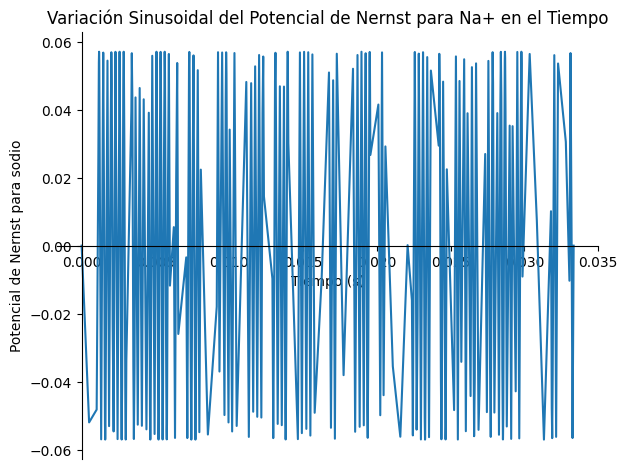

In [30]:
from sympy import symbols, sin, pi, log, plot

# Definir símbolos
Vin, VNa, ENa, t, f, Ts, Na_i, Na_o, Na_z, R, T, F = symbols('V_in V_Na E_Na t f T_s Na_i Na_o Na_z R T F')

# Mostrar los símbolos de forma simbólica
display(Vin, VNa, ENa, t, f, Ts)

# Frecuencia y periodo
f = 60  # Frecuencia en Hz
Ts = 1/f  # Periodo de la señal

# Variación sinusoidal
Vin = sin(2 * pi * t * f / Ts)

# Ecuación de Nernst para el potencial de equilibrio de Na+
ENa = -(R * T / (Na_z * F)) * log(Na_i / Na_o)

# Potencial de Nernst multiplicado por la variación sinusoidal
VNa = ENa * Vin

# Gráfica
# 2 periodo (2T = 2/60 = 0.033334)
plot(VNa.subs({Na_o: 460, Na_i: 50, Na_z: 1, f: 60, Ts: 1/60, F: 96485, T: 298.15, R: 8.314}), (t, 0,2*Ts),
     title="Variación Sinusoidal del Potencial de Nernst para Na+ en el Tiempo", xlabel="Tiempo (s)", ylabel="Potencial de Nernst para sodio")


t

R

Na_i

Na_o

T

Na_z

F

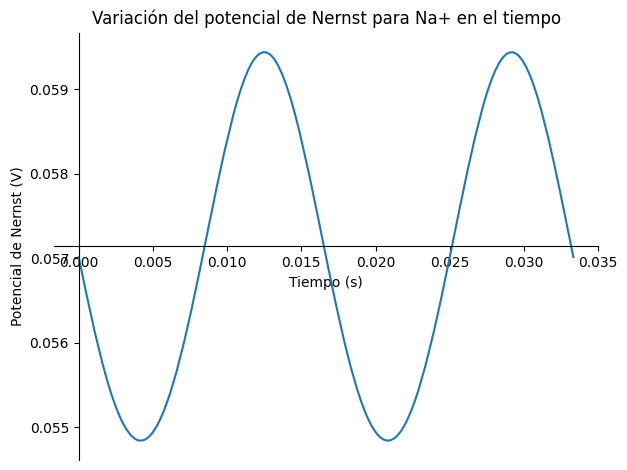

In [31]:
import sympy
from sympy import symbols, sin, pi, log, plot

# Definir símbolos
t, R, Na_i, Na_o, T, Na_z, F = symbols('t R Na_i Na_o T Na_z F')
display(t, R, Na_i, Na_o, T, Na_z, F)
# Frecuencia y periodo
f = 60  # Frecuencia en Hz
Ts = 1/f  # Periodo de la señal

R_value = 8.314
F_value = 96485
T_value = 298.15
Na_z_value = 1

# Concentraciones dadas en mM, convertidas a M para uso en la ecuación de Nernst
Na_i_value = 50  # Concentración interna en M
Na_o_value = 460  # Concentración externa en M

# Variación sinusoidal de 10% del valor mínimo de concentración interna
A = 0.1 * Na_i_value  # 10% del valor mínimo de concentración interna de Na+
Vin = A * sin(2 * pi * f * t)

# Concentraciones de Na+ variando sinusoidalmente en el tiempo
Na_i_t = Na_i_value + Vin  # Variación aplicada a la concentración interna
Na_o_t = Na_o_value + Vin  # Variación aplicada a la concentración externa

# Ecuación de Nernst para Na+ en función de las concentraciones variables
ENa_t = -(R * T / (Na_z * F)) * log(Na_i_t / Na_o_t)

# Sustituir valores y graficar
ENa_t_valores = ENa_t.subs({Na_i: Na_i_t, Na_o: Na_o_t, Na_z: Na_z_value, F: F_value, T: T_value, R: R_value})
plot(ENa_t_valores, (t, 0, 2*Ts),
     title="Variación del potencial de Nernst para Na+ en el tiempo",
     xlabel="Tiempo (s)", ylabel="Potencial de Nernst (V)")
